# <span style="display:block; text-align:center; color:#800080">Spam Detection </span>
-----

![](sms.jpeg)

#### Introduction:

Spam emails have become a major problem in today's digital world, causing inconvenience, privacy risks, and security threats. To combat this issue, we need effective spam detection systems. This project aims to develop a robust spam detection system using machine learning and natural language processing techniques. By analyzing email content, sender information, and other relevant features, we can accurately classify incoming messages as spam or legitimate. The benefits include time-saving, improved security, and enhanced network efficiency. We will explore different machine learning algorithms, train models with labeled data, and employ feature engineering techniques for optimal performance. The ultimate goal is to create a highly accurate and efficient spam detection system that can be seamlessly integrated into existing email infrastructure.

#### Dataset

It contains a collection of SMS messages labeled as either spam or legitimate (ham). The dataset includes the following columns:

"v1" or "category": This column represents the label or category assigned to each SMS message. It contains two possible values: "spam" for spam messages and "ham" for legitimate messages.

"v2" or "message": This column contains the actual text content of the SMS messages. It includes the message body, which is the primary component used for analysis and classification.

These two columns, "category" and "message", are the key components of the dataset. The "category" column specifies the classification of each SMS message, while the "message" column provides the textual content that will be analyzed to determine if the message is spam or legitimate.

This dataset serves as a valuable resource for training and evaluating spam detection systems. By utilizing the labeled examples, machine learning algorithms can be applied to learn patterns and characteristics of spam messages, enabling the development of accurate and efficient spam detection models.

### Import Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

C:\Users\HITESH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file and store the data in a DataFrame
df = pd.read_csv(r'spam.csv', encoding='latin1')

In [3]:
# Display a random sample of 5 rows from the DataFrame
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
312,ham,He says he'll give me a call when his friend's...,NaN,NaN,NaN
1347,ham,She doesnt need any test.,NaN,NaN,NaN
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?,NaN,NaN,NaN
3891,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
4305,ham,Awww dat is sweet! We can think of something t...,NaN,NaN,NaN


In [4]:
# Print the shape of the DataFrame
df.shape

(5572, 5)

## Data Cleaning

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Remove unnecessary columns from the dataframe
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
# This code selects a random sample of 5 rows from a DataFrame

df.sample(5)

,v1,v2
4532,spam,Gr8 new service - live sex video chat on your ...
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
5125,ham,After my work ah... Den 6 plus lor... U workin...
4839,spam,PRIVATE! Your 2003 Account Statement for shows...


In [8]:
# Rename columns in DataFrame
df.rename(columns={'v1': 'category', 'v2': 'message'}, inplace=True)

In [9]:
# Display a random sample of 5 rows from the dataframe
df.sample(5)

,category,message
1679,ham,"Today is \song dedicated day..\"" Which song wi..."
1770,ham,Dont show yourself. How far. Put new pictures ...
1996,ham,Lol boo I was hoping for a laugh
5087,ham,"Good morning, im suffering from fever and dyse..."
2900,spam,Ur cash-balance is currently 500 pounds - to m...


In [10]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
encoder = LabelEncoder()

In [11]:
df['category'] = encoder.fit_transform(df['category'])

In [12]:
df.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

category    0
message     0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
# This code counts the occurrences of each unique value in the 'target' column of the DataFrame 'df'.

df['category'].value_counts()

0    4516
1     653
Name: category, dtype: int64

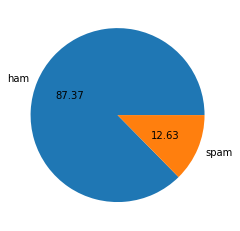

In [19]:
# Display a pie chart of the target variable distribution
plt.pie(df['category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [20]:
import nltk

# Download the 'punkt' package from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Calculate the number of characters in each row of the 'text' column and store it in a new column 'num_characters'
df['num_characters'] = df['message'].apply(len)

In [22]:
df.head()

,category,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Calculate the number of words in each text and store the result in a new column 'num_words'
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,category,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Calculate the number of sentences in each text
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
# Print descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences' in the DataFrame df
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# Calculate descriptive statistics for specific columns in the DataFrame
df[df['category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# Calculate descriptive statistics for 'num_characters', 'num_words', and 'num_sentences' columns
df[df['category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


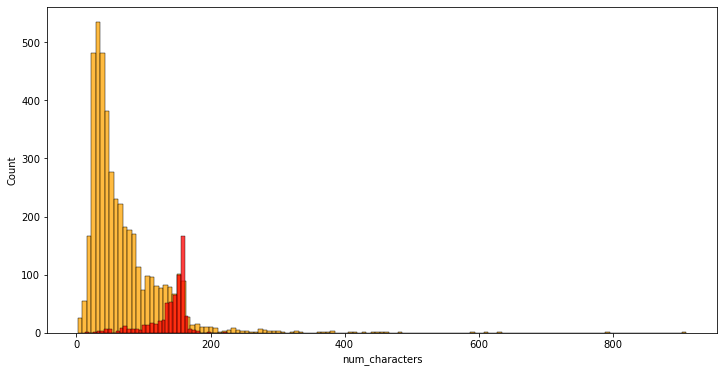

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['category'] == 0]['num_characters'], color='orange')
sns.histplot(df[df['category'] == 1]['num_characters'], color='red')
plt.show()

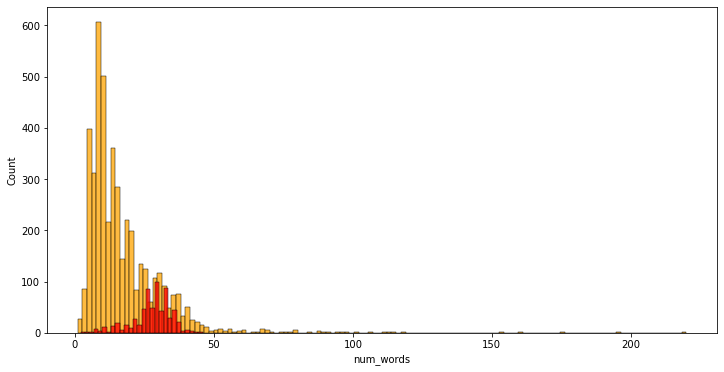

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['category'] == 0]['num_words'] ,color='orange')
sns.histplot(df[df['category'] == 1]['num_words'],color='red')
plt.show()

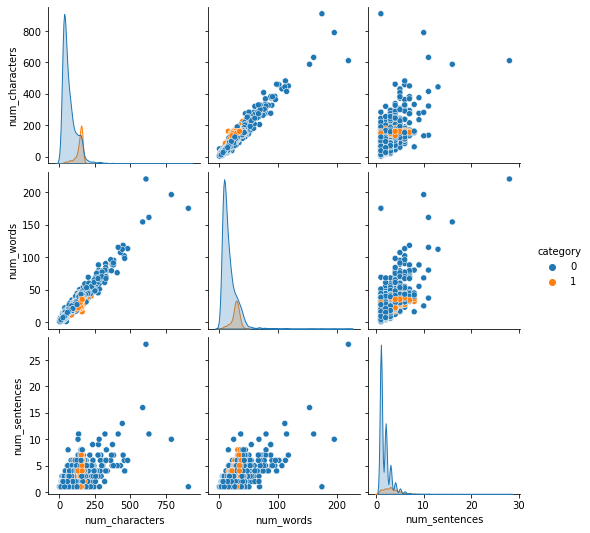

In [31]:
# Plot a pairplot of the DataFrame
sns.pairplot(df, hue='category')
plt.show()

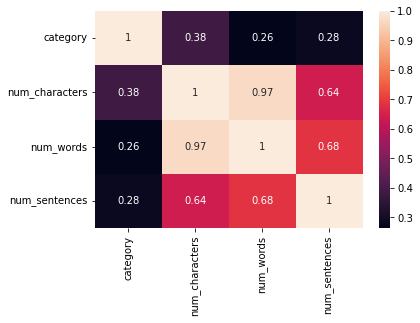

In [32]:
# Generate a heatmap of the correlation matrix of df
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

## Data Preprocessing

In [33]:
def transform_text(text: str) -> str:
    """
    Transforms the given text by performing various operations.

    Args:
        text (str): The input text to be transformed.

    Returns:
        str: The transformed text.
    """
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
# Importing the PorterStemmer class from the nltk.stem.porter module
from nltk.stem.porter import PorterStemmer

# Creating an instance of the PorterStemmer class
ps = PorterStemmer()

In [35]:
import nltk
nltk.download('stopwords')
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Apply the function 'transform_text' to the 'text' column of the DataFrame and store the result in the 'transformed_text' column.
df['transformed_text'] = df['message'].apply(transform_text)

In [37]:
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
# Generate a word cloud for spam text

spam_wc = wc.generate(df[df['category'] == 1]['transformed_text'].str.cat(sep=" "))

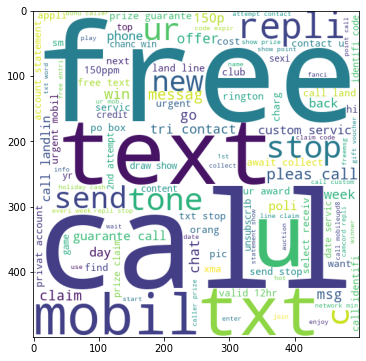

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [40]:
# Generate a word cloud for the text data in the 'transformed_text' column where the 'target' value is 0.
ham_wc = wc.generate(df[df['category'] == 0]['transformed_text'].str.cat(sep=" "))

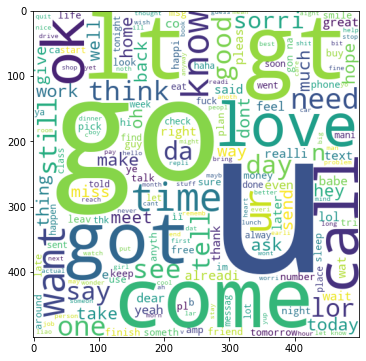

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [42]:
spam_corpus = []
# Loop through each message in the DataFrame where the target is 1
for msg in df[df['category'] == 1]['transformed_text'].tolist():
    # Split the message into words and loop through each word
    for word in msg.split():
        # Append the word to the spam_corpus list
        spam_corpus.append(word)

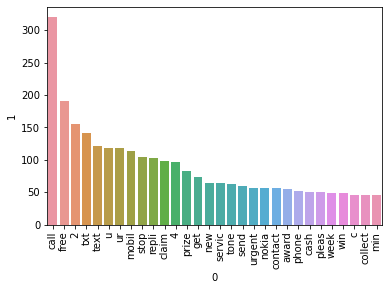

In [43]:
from collections import Counter
# Create a DataFrame of word counts from spam_corpus and plot a bar chart
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts)
sns.barplot(df_word_counts[0], df_word_counts[1])

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the bar chart
plt.show()

In [44]:
ham_corpus = []
# Iterate over each message in the DataFrame where the target is 0
for msg in df[df['category'] == 0]['transformed_text'].tolist():
    # Split the message into words
    for word in msg.split():
        # Append each word to the ham_corpus list
        ham_corpus.append(word)

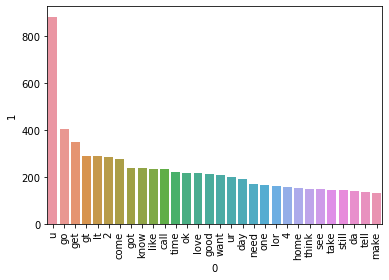

In [45]:
    word_counts = Counter(ham_corpus)
    most_common_words = pd.DataFrame(word_counts.most_common(30))
    
    sns.barplot(most_common_words[0], most_common_words[1])
    plt.xticks(rotation='vertical')
    plt.show()

## Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Create an instance of TfidfVectorizer with a maximum of 3000 features
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
# Display the shape of X
X.shape

(5169, 3000)

In [49]:
y = df['category'].values

In [50]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [53]:
NB = {
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'DecisionTreeClassifier':dtc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'GradientBoostingClassifier':gbdt,
    
}

In [54]:
def nb_classifier(NB, X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a Naive Bayes classifier.

    Args:
        NB (NaiveBayes): The Naive Bayes classifier.
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        X_test (numpy.ndarray): Testing data features.
        y_test (numpy.ndarray): Testing data labels.

    Returns:
        tuple: A tuple containing the accuracy, precision.
    """
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [55]:
accuracy_scores = []
precision_scores = []

# Iterate over each classifier
for name, clf in NB.items():
    # Call the nb_classifier function
    current_accuracy, current_precision = nb_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Print the results
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    print('---------------------------------------------------------------')
    
    # Append the scores and matrices to their respective lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For GaussianNB
Accuracy - 0.8694390715667312
Precision - 0.5068493150684932
---------------------------------------------------------------
For MultinomialNB
Accuracy - 0.9709864603481625
Precision - 1.0
---------------------------------------------------------------
For BernoulliNB
Accuracy - 0.9835589941972921
Precision - 0.991869918699187
---------------------------------------------------------------
For DecisionTreeClassifier
Accuracy - 0.9294003868471954
Precision - 0.8282828282828283
---------------------------------------------------------------
For LogisticRegression
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
---------------------------------------------------------------
For RandomForestClassifier
Accuracy - 0.9748549323017408
Precision - 0.9827586206896551
---------------------------------------------------------------
For GradientBoostingClassifier
Accuracy - 0.9477756286266924
Precision - 0.92
--------------------------------------------------------------

In [56]:
# Create a DataFrame to store the algorithm scores
nb_df = pd.DataFrame({
    'Algorithm': NB.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
}).sort_values('Precision', ascending=False)

In [57]:
nb_df

,Algorithm,Accuracy,Precision
1,MultinomialNB,0.970986,1.000000
2,BernoulliNB,0.983559,0.991870
5,RandomForestClassifier,0.974855,0.982759
4,LogisticRegression,0.958414,0.970297
6,GradientBoostingClassifier,0.947776,0.920000
3,DecisionTreeClassifier,0.929400,0.828283
0,GaussianNB,0.869439,0.506849


In [58]:
nb_df1 = nb_df[['Algorithm','Accuracy','Precision']]

In [59]:
# Use melt to reshape the dataframe
nb_df2 = pd.melt(nb_df1, id_vars="Algorithm")

In [60]:
nb_df2

,Algorithm,variable,value
0,MultinomialNB,Accuracy,0.970986
1,BernoulliNB,Accuracy,0.983559
2,RandomForestClassifier,Accuracy,0.974855
3,LogisticRegression,Accuracy,0.958414
4,GradientBoostingClassifier,Accuracy,0.947776
5,DecisionTreeClassifier,Accuracy,0.929400
6,GaussianNB,Accuracy,0.869439
7,MultinomialNB,Precision,1.000000
8,BernoulliNB,Precision,0.991870
9,RandomForestClassifier,Precision,0.982759


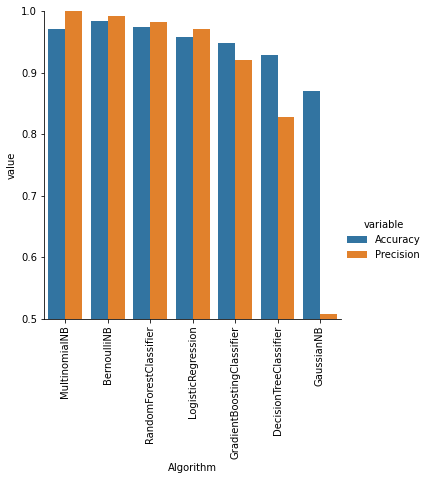

In [61]:

# Create a categorical plot using seaborn
sns.catplot(x='Algorithm', y='value', hue='variable', data=nb_df2, kind='bar', height=5)

# Set the y-axis limits
plt.ylim(0.5, 1.0)

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))